In [7]:
library(readxl)
library(dplyr)
library(WDI)
library(countrycode)
library(ggvis)
library(ggplot2)
library(tidyr)
library(magrittr)

Warning message:
"package 'tidyr' was built under R version 3.3.2"
Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract



In [104]:
# Load the readxl package
library(readxl)
library(dplyr)
library(WDI)
library(countrycode)
library(ggvis)
library(ggplot2)

# Print out the names of both spreadsheets
#excel_sheets("GCI_Dataset_2006-2015.xlsx")

# Read the sheets, one by one
wci_data_raw <- read_excel("GCI_Dataset_2006-2015.xlsx", skip = 2, sheet = 2, col_names = TRUE)
country <- read_excel("GCI_Dataset_2006-2015.xlsx", skip = 3, sheet = 4, col_names = FALSE)

# Display the structure of pop_list
#str(wci_data)
#head(sheet_1)

gdp_data = WDI(indicator='NY.GDP.PCAP.KD', start=1960, end=2016)
gdp_data <- gdp_data %>%
    filter(year == "2015") %>%
    mutate(X0 = countrycode(iso2c, "iso2c", "iso3c", warn = FALSE))

wci_data <- filter(wci_data_raw, Attribute == "Value", Edition == "2014-2015", `GLOBAL ID` == "GCI.B.05")
wci_data <- gather(wci_data, X0, GCI, -c(1:8))
wci_data <- mutate(wci_data, GCI_s = round(as.numeric(GCI), 2))
wci_data <- left_join(wci_data, country, by = "X0") 
wci_data <- left_join(wci_data, gdp_data, by = "X0")
wci_data <- mutate(wci_data, PPP = round(as.numeric(NY.GDP.PCAP.KD, 2)))

wci_data_2 <- select(wci_data, X0, X1, X3, X4, PPP, GCI_s) 
wci_data_2 <- filter(wci_data_2, !is.na(GCI_s), !is.na(PPP))
wci_data_2 <- arrange(wci_data_2, desc(PPP))
#    layer_text()
    #layer_model_predictions(model = "lm")
    #scale_numeric("x", domain = c(6, 0))

#ggplot(wci_data, aes(x=GCI, y=NY.GDP.PCAP.KD)) + geom_jitter()

In [105]:
asean <- c("SGP", "IDN", "MYS", "THA", "VNM", "BRN", "KHM", "LAO", "MMR", "PHL")
wci_data_asean <- wci_data[wci_data$X0 %in% asean,]
wci_data_asean <- filter(wci_data_asean, !is.na(GCI_s))


In [106]:
library(ggvis)

ggvis(wci_data_asean, ~GCI_s, ~PPP) %>%
    layer_points(fill = ~X3) %>%
    layer_smooths(span = 1, stroke := "red") %>%
    layer_text(text := ~X0, fontSize := 10, fill = ~X3)

In [276]:
#str(wci_data)
gci_id <- c("GCI.A.01", "GCI.A.02", "GCI.A.03", "GCI.A.04", "GCI.B.05", "GCI.B.06", "GCI.B.07", "GCI.B.08", "GCI.B.09", "GCI.B.10", "GCI.C.11", "GCI.C.12")
wci_data_all <- wci_data_raw[wci_data_raw$"GLOBAL ID" %in% gci_id, ]
wci_data_all <- filter(wci_data_all, Attribute == "Value", Edition == "2015-2016")
wci_data_all <- gather(wci_data_all, X0, GCI, -c(1:8))
wci_data_all <- mutate(wci_data_all, GCI_s = round(as.numeric(GCI), 2))
#wci_data_raw[wci_data_raw$"GLOBAL ID" %in% gci_id, ]

In [294]:
#wci_data_idn <- filter(wci_data_all, X0 %in% c("IDN", "SGP"))
wci_data_idn <- filter(wci_data_all, X0 == "IDN")
wci_data_idn <- select(wci_data_idn, X0, Series, GCI_s)
wci_data_idn <- spread(wci_data_idn, Series, GCI_s)


wci_data_avg_asean <- filter(wci_data_all, X0 %in% asean)
wci_data_avg_asean <- group_by(wci_data_avg_asean, Series)
wci_data_avg_asean <- summarise(wci_data_avg_asean, GCI_s = mean(GCI_s, na.rm = TRUE))
wci_data_avg_asean <- spread(wci_data_avg_asean, Series, GCI_s)
wci_data_avg_asean <- mutate(wci_data_avg_asean, X0 = "ASEAN")

wci_data_world <- group_by(wci_data_all, Series) %>%
    summarise(GCI_s = mean(GCI_s, na.rm = TRUE)) %>%
    spread(Series, GCI_s) %>%
    mutate(X0 = "WORLD")


wci_data_combined_1 <- rbind(wci_data_idn, wci_data_avg_asean)
wci_data_combined_2 <- rbind(wci_data_idn, wci_data_world)
#wci_data_combined
#wci_data_avg_asean[1,]
#wci_data_avg_asean #[2:13]


,10th pillar: Market size,11th pillar: Business sophistication,12th pillar: Innovation,1st pillar: Institutions,2nd pillar: Infrastructure,3rd pillar: Macroeconomic environment,4th pillar: Health and primary education,5th pillar: Higher education and training,6th pillar: Goods market efficiency,7th pillar: Labor market efficiency,8th pillar: Financial market development,9th pillar: Technological readiness
1,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0000,7.000000,7.000000,7.000000,7.000000,7.0000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000
IDN,5.740000,4.350000,3.940000,4.090000,4.190000,5.500000,5.5900,4.450000,4.430000,3.740000,4.190000,3.4900
WORLD,3.885714,4.045714,3.519286,4.048714,4.015286,4.774643,5.4965,4.235286,4.356643,4.220786,3.910571,4.0645


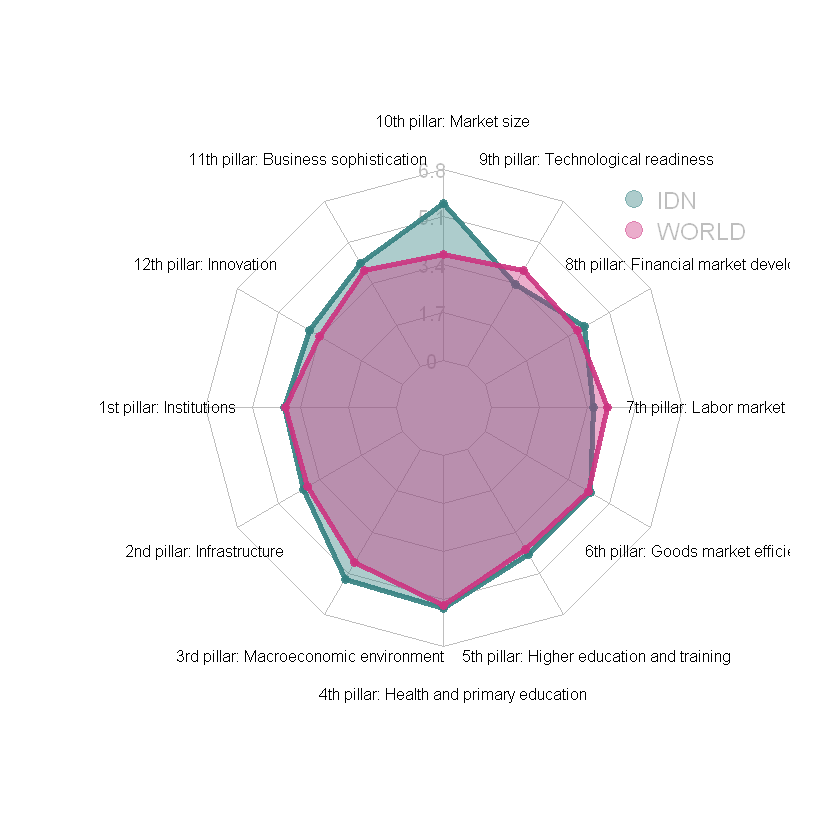

In [296]:
# Library
library(fmsb)
data=as.data.frame(wci_data_combined_2[2:13])
#colnames(data)=c("Institutions" , "Infrastructure" , "Macroeconomic Environment" , "Health and Primary Education" , 
#                 "Higher Education & Training", "Goods Market Efficiency", "Labour Market Efficiency", "Financial Market Development",
#                 "Technological Readiness", "Market Size", "Business Sophistication", "Innovation")
rownames(data)=c("IDN", "WORLD")
data=rbind(rep(7,12) , rep(0,12) , data)
data

colors_border=c( rgb(0.2,0.5,0.5,0.9), rgb(0.8,0.2,0.5,0.9) ) # , rgb(0.7,0.5,0.1,0.9) )
colors_in=c( rgb(0.2,0.5,0.5,0.4), rgb(0.8,0.2,0.5,0.4) ) # , rgb(0.7,0.5,0.1,0.4) )
radarchart( data  , axistype=1 , 
    #custom polygon
    pcol=colors_border , pfcol=colors_in , plwd=4 , plty=1,
    #custom the grid
    cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,7,1.7), cglwd=0.8,
    #custom labels
    vlcex=0.8 
    )
legend(x=0.7, y=1, legend = rownames(data[-c(1,2),]), bty = "n", pch=20 , col=colors_in , text.col = "grey", cex=1.2, pt.cex=3)

In [306]:
library(WDI)

WDI

function (country = "all", indicator = "NY.GNS.ICTR.GN.ZS", start = 2005, 
    end = 2011, extra = FALSE, cache = NULL) 
{
    indicator = gsub("[^a-zA-Z0-9\\.]", "", indicator)
    country = gsub("[^a-zA-Z0-9]", "", country)
    if (!("all" %in% country)) {
        country_bad = country[!(country %in% WDI_data$country[, 
            "iso2c"])]
        country = country[!(country %in% country_bad)]
        if (length(country_bad) > 0) {
            warning(paste("Unable to download data on countries: ", 
                paste(country_bad, collapse = ", ")))
        }
        if (length(country) > 0) {
            country = paste(country, collapse = ";")
        }
        else {
            stop("No valid country was requested")
        }
    }
    else {
        country = "all"
    }
    if (!(start <= end)) {
        stop("start/end must be integers with start <= end")
    }
    dat = lapply(indicator, function(j) try(wdi.dl(j, country, 
        start, end), silent = TRUE))
    good = unlist(lapply(dat, function(i) class(i)) == "data.frame")
    if (any(!good)) {
        warning(paste("Unable to download indicators ", paste(indicator[!good], 
            collapse = " ; ")))
    }
    dat = dat[good]
    dat = Reduce(function(x, y) merge(x, y, all = TRUE), dat)
    if (!is.null(cache)) {
        country_data = cache$country
    }
    else {
        country_data = WDI_data$country
    }
    if (extra == TRUE) {
        dat = merge(dat, country_data, all.x = TRUE)
    }
    countries = country[country != "all" & !(country %in% dat$iso2c)]
    if (length(countries) > 0) {
    }
    return(dat)
}
<environment: namespace:WDI>

In [34]:
library(googleVis)

gci_id_all <- c("GCI", "GCI.A.01", "GCI.A.02", "GCI.A.03", "GCI.A.04", "GCI.B.05", "GCI.B.06", "GCI.B.07", "GCI.B.08", "GCI.B.09", "GCI.B.10", "GCI.C.11", "GCI.C.12")
wci_data_idn_time <- wci_data_raw[wci_data_raw$"GLOBAL ID" %in% gci_id_all, ] %>%
  filter(Attribute == "Value") %>%
  gather(X0, GCI, -c(1:8)) %>%
  mutate(GCI_s = as.numeric(round(as.numeric(GCI), 2)), year = as.numeric(substr(Edition, start=6, stop=9))) %>%
  filter(X0 == "IDN") %>%
  select(Series, `GLOBAL ID`, GCI_s, year)
wci_data_idn_time
wci_data_idn_time %>%
    ggvis(x = ~year, y = ~GCI_s, stroke = ~Series) %>%
    layer_lines() %>%
    layer_points(shape = ~Series, fill = ~Series)
    

#Motion=gvisMotionChart(wci_data_idn_time, 
#                       idvar="GCI_s", 
#                       timevar="year")
#plot(Motion)

Series,GLOBAL ID,GCI_s,year
1st pillar: Institutions,GCI.A.01,4.09,2016
2nd pillar: Infrastructure,GCI.A.02,4.19,2016
3rd pillar: Macroeconomic environment,GCI.A.03,5.50,2016
4th pillar: Health and primary education,GCI.A.04,5.59,2016
5th pillar: Higher education and training,GCI.B.05,4.45,2016
6th pillar: Goods market efficiency,GCI.B.06,4.43,2016
7th pillar: Labor market efficiency,GCI.B.07,3.74,2016
8th pillar: Financial market development,GCI.B.08,4.19,2016
9th pillar: Technological readiness,GCI.B.09,3.49,2016
10th pillar: Market size,GCI.B.10,5.74,2016


In [7]:
library(WDI)
library(countrycode)
library(dplyr)
library(tidyr)

wb_data = WDI(indicator=c('NY.GDP.MKTP.CD', 'SE.XPD.TOTL.GD.ZS'), start=1960, end=2016)
wb_data <- wb_data %>%
    mutate(X0 = countrycode(iso2c, "iso2c", "iso3c", warn = FALSE), edu_value = as.numeric(NY.GDP.MKTP.CD)*as.numeric(SE.XPD.TOTL.GD.ZS)/100) %>%
    filter(X0 == "IDN", !is.na(edu_value))
wb_data

#edu_data = WDI(indicator='SE.XPD.TOTL.GD.ZS', start=1960, end=2016)
#edu_data <- edu_data %>%
#    mutate(X0 = countrycode(iso2c, "iso2c", "iso3c", warn = FALSE))

#edu_value <- left_join(gdp_data, edu_data)
    


Warning message:
"package 'WDI' was built under R version 3.3.2"Loading required package: RJSONIO
Warning message:
"package 'RJSONIO' was built under R version 3.3.2"Warning message:
"package 'countrycode' was built under R version 3.3.2"

iso2c,country,year,NY.GDP.MKTP.CD,SE.XPD.TOTL.GD.ZS,X0,edu_value
ID,Indonesia,1972,10997590361,2.64225,IDN,290583838
ID,Indonesia,1989,94451425689,0.82737,IDN,781462749
ID,Indonesia,1994,176892148243,0.99855,IDN,1766356542
ID,Indonesia,1995,202132032633,1.00435,IDN,2030112963
ID,Indonesia,1996,227369676089,1.07855,IDN,2452295599
ID,Indonesia,1997,215748853372,1.07208,IDN,2313000342
ID,Indonesia,2001,160446947785,2.46003,IDN,3947043176
ID,Indonesia,2002,195660611165,2.64569,IDN,5176573154
ID,Indonesia,2003,234772459160,3.21800,IDN,7554977584
ID,Indonesia,2004,256836883574,2.74846,IDN,7059059150


In [73]:
library(gridExtra)
library(ggplot2)
library(grid)

index <- c("GCI.A.04", "GCI.B.05")
wb_data_2 <- left_join(wb_data, wci_data_idn_time, by = 'year') %>%
    filter(`GLOBAL ID` %in% index)
#head(wci_data_idn_time)
#wb_data_2

wb_data_2 %>%
    ggvis(x = ~year) %>%
    layer_lines(y = ~edu_value, stroke := "red") %>%
    add_axis("y", orient = "left", title = "Education Spending (USD)") %>%
    add_axis("y", 'ypmg', orient = "right", title= "GCI") %>%
    layer_points(prop('y', ~GCI_s, scale="ypmg"), fill = ~Series) %>%
    add_axis("x", title = "Year")




In [1]:
library("foreign")
library("intsvy")
library("dplyr")
library("ggplot2")
library("tidyr")

stud2015 <- read.spss("D:/Downloads/CY6_MS_CMB_STU_QQQ.sav", use.value.labels = TRUE, to.data.frame = TRUE)
genderMath <- pisa2015.mean.pv(pvlabel = "MATH", by = c("CNT", "ST004D01T"), data = stud2015)

genderMath <- genderMath[,c(1,2,4,5)]
genderMath %>%
  select(CNT, ST004D01T, Mean) %>%
  spread(ST004D01T, Mean) -> genderMathWide

genderMathSelected <-
  genderMathWide %>%
  filter(CNT %in% c("Austria", "Japan", "Switzerland",  "Poland", "Singapore", "Finland", "Singapore", "Korea", "United States"))

pl <- ggplot(genderMathWide, aes(Female, Male)) +
  geom_point() +
  geom_point(data=genderMathSelected, color="red") +
  geom_text(data=genderMathSelected, aes(label=CNT), color="grey20") +
  geom_abline(slope=1, intercept = 0) + 
  geom_abline(slope=1, intercept = 20, linetype = 2, color="grey") + 
  geom_abline(slope=1, intercept = -20, linetype = 2, color="grey") +
  geom_text(x=425, y=460, label="Boys +20 points", angle=45, color="grey", size=8) + 
  geom_text(x=460, y=425, label="Girls +20 points", angle=45, color="grey", size=8) + 
  coord_fixed(xlim = c(400,565), ylim = c(400,565)) +
  theme_bw() + ggtitle("PISA 2015 in Math - Gender Gap") +
  xlab("PISA 2015 Math score for girls") +
  ylab("PISA 2015 Math score for boys")

Warning message:
"package 'intsvy' was built under R version 3.3.2"Warning message:
"package 'dplyr' was built under R version 3.3.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.2"Warning message:
"package 'tidyr' was built under R version 3.3.2"Warning message in read.spss("D:/Downloads/CY6_MS_CMB_STU_QQQ.sav", use.value.labels = TRUE, :
"D:/Downloads/CY6_MS_CMB_STU_QQQ.sav: Unrecognized record type 7, subtype 18 encountered in system file"Warning message in read.spss("D:/Downloads/CY6_MS_CMB_STU_QQQ.sav", use.value.labels = TRUE, :
"D:/Downloads/CY6_MS_CMB_STU_QQQ.sav: Unrecognized record type 7, subtype 21 encountered in system file"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are

ERROR: Error in eval(expr, envir, enclos): could not find function "pisa2015.mean.pv"


In [78]:
pisa2015.mean.pv(pvlabel = "SCIE", by = "CNT", data = pisa15)

ERROR: Error in eval(expr, envir, enclos): could not find function "pisa2015.mean.pv"


In [63]:
library(readxl)
library(dplyr)
library(tidyr)

pisa_all <- read_excel("PISA.xlsx", sheet = 1, col_names = TRUE)

pisa_ind <- filter(pisa_all, X0 == "IND")
pisa_ind <- gather(pisa_ind, year, value, -c(1:2))
pisa_ind <- mutate(pisa_ind, year = as.numeric(year), value = as.numeric(value))

pisa_all
pisa_ind

PISA,X0,2015,2012,2009,2006,2003,2000
Science,IDN,403,382,383,393,395,393
Reading,IDN,397,396,402,393,382,378
Mathematics,IDN,386,375,371,391,360,367
Science,SGP,551,NA,NA,NA,NA,NA
Reading,SGP,542,NA,NA,NA,NA,NA
Mathematics,SGP,573,NA,NA,NA,NA,NA
Science,OECD,501,NA,NA,NA,NA,NA
Reading,OECD,496,NA,NA,NA,NA,NA
Mathematics,OECD,494,NA,NA,NA,NA,NA
Science,VNM,528,NA,NA,NA,NA,NA


PISA,X0,year,value


In [62]:
#head(wb_data)
#head(pisa_ind) 
library(ggvis)

pisa_ind %>% 
    full_join(wb_data, by = c("X0", "year")) %>%
    ggvis(x = ~year) %>%
    layer_points(y = ~edu_value, fill := "red") %>%
    add_axis("y", orient = "left", title = "Education Spending (USD)") %>%
    add_axis("y", 'ypmg', orient = "right", title= "PISA Mean Score") %>%
    layer_points(prop('y', ~value, scale="ypmg"), fill = ~PISA, shape = ~PISA) %>%
    add_axis("x", title = "Year")

X0,Mathematics,Reading,Science
IDN,386,397,403
OECD,494,496,501


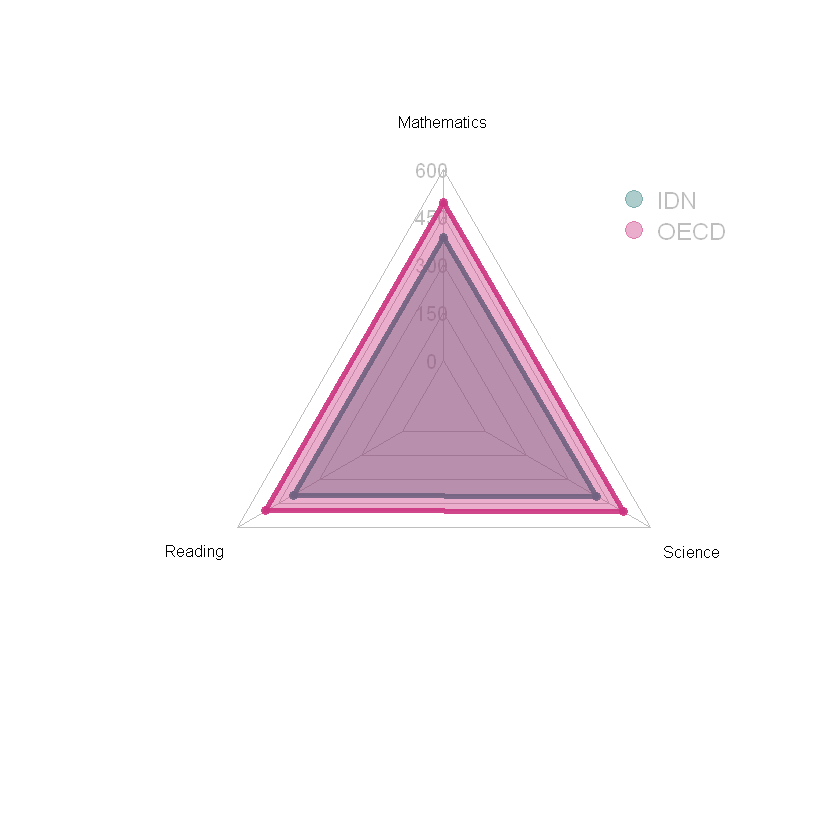

In [86]:
# Library
library(fmsb)

pisa_ind_vs_sgp <- filter(pisa_all, X0 %in% c("IDN", "OECD")) 
pisa_ind_vs_sgp <- mutate(pisa_ind_vs_sgp, `2015` = as.numeric(`2015`))
pisa_ind_vs_sgp <- select(pisa_ind_vs_sgp, `PISA`, `X0`,`2015`) 
pisa_ind_vs_sgp <- spread(pisa_ind_vs_sgp, PISA, `2015`)
pisa_ind_vs_sgp

data=as.data.frame(pisa_ind_vs_sgp[2:4])
#colnames(data)=c("Institutions" , "Infrastructure" , "Macroeconomic Environment" , "Health and Primary Education" , 
#                 "Higher Education & Training", "Goods Market Efficiency", "Labour Market Efficiency", "Financial Market Development",
#                 "Technological Readiness", "Market Size", "Business Sophistication", "Innovation")
rownames(data)=c("IDN", "OECD")
data=rbind(rep(600,3) , rep(0,3) , data)
#data

colors_border=c( rgb(0.2,0.5,0.5,0.9), rgb(0.8,0.2,0.5,0.9)  , rgb(0.7,0.5,0.1,0.9) )
colors_in=c( rgb(0.2,0.5,0.5,0.4), rgb(0.8,0.2,0.5,0.4)  , rgb(0.7,0.5,0.1,0.4) )
radarchart( data  , axistype=1 , 
    #custom polygon
    pcol=colors_border , pfcol=colors_in , plwd=4 , plty=1,
    #custom the grid
    cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,600,150), cglwd=0.8,
    #custom labels
    vlcex=0.8 
    )
legend(x=0.7, y=1, legend = rownames(data[-c(1,2),]), bty = "n", pch=20 , col=colors_in , text.col = "grey", cex=1.2, pt.cex=3)

In [108]:
library(hdr)

hdi <- get_data(indicator = 137506, country = "IDN")
hdi <- mutate(hdi, X0 = as.character(iso3c))
hdi %>%
    full_join(wb_data, by = c("X0", "year")) %>%
    ggvis(x = ~year) %>%
    layer_points(y = ~edu_value, fill := "red") %>%
    add_axis("y", orient = "left", title = "Education Spending (USD)") %>%
    add_axis("y", 'ypmg', orient = "right", title= "HDI") %>%
    layer_points(prop('y', ~value, scale="ypmg")) %>%
    add_axis("x", title = "Year")

In [ ]:
library(ggvis)

ggvis(wci_data_asean, ~GCI_s, ~PPP) %>%
    layer_points(fill = ~X3) %>%
    layer_smooths(span = 1, stroke := "red") %>%
    layer_text(text := ~X0, fontSize := 10, fill = ~X3)

In [129]:
asean <- c("SGP", "IDN", "MYS", "THA", "VNM", "BRN", "KHM", "LAO", "MMR", "PHL")
hdi_all <- get_data(indicator = 137506, country=asean, year = 2013)
hdi_all <- mutate(hdi_all, X0 = as.character(iso3c))
gdp_data = WDI(indicator='NY.GDP.PCAP.KD', start=2013, end=2016)
gdp_data <- gdp_data %>%
    filter(year == "2013") %>%
    mutate(X0 = countrycode(iso2c, "iso2c", "iso3c", warn = FALSE))
hdi_combined <- left_join(hdi_all, country, by = "X0") %>%
    left_join(gdp_data, by = "X0") %>%
    mutate(PPP = round(as.numeric(NY.GDP.PCAP.KD, 2)))
head(country)
head(hdi_combined)

library(ggvis)

ggvis(hdi_combined, ~value, ~PPP) %>%
    layer_points(fill = ~X3) %>%
    layer_smooths(span = 1, stroke := "red") %>%
    layer_text(text := ~X0, fontSize := 10, fill = ~X3)

X0,X1,X2,X3,X4
ALB,Albania,Economy,Upper-middle income,Emerging and Developing Europe
DZA,Algeria,Economy,Upper-middle income,"Middle East, North Africa, and Pakistan"
AGO,Angola,Economy,Upper-middle income,Sub-Saharan Africa
ARG,Argentina,Economy,High income,Latin America and the Caribbean
ARM,Armenia,Economy,Lower-middle income,Commonwealth of Independent States
AUS,Australia,Economy,High income,Advanced economies


id,indicator,iso3c,country.x,year.x,value,X0,X1,X2,X3,X4,iso2c,country.y,NY.GDP.PCAP.KD,year.y,PPP
137506,HDI: Human development index (HDIg) value,BRN,Brunei Darussalam,2013,0.852,BRN,Brunei Darussalam,Economy,High income,Emerging and Developing Asia,BN,Brunei Darussalam,34132.4553,2013,34132
137506,HDI: Human development index (HDIg) value,IDN,Indonesia,2013,0.684,IDN,Indonesia,Economy,Lower-middle income,Emerging and Developing Asia,ID,Indonesia,3570.9312,2013,3571
137506,HDI: Human development index (HDIg) value,KHM,Cambodia,2013,0.584,KHM,Cambodia,Economy,Low income,Emerging and Developing Asia,KH,Cambodia,920.3036,2013,920
137506,HDI: Human development index (HDIg) value,LAO,Lao People's Democratic Republic,2013,0.569,LAO,Lao PDR,Economy,Lower-middle income,Emerging and Developing Asia,LA,Lao PDR,1371.4257,2013,1371
137506,HDI: Human development index (HDIg) value,MMR,Myanmar,2013,0.524,MMR,Myanmar,Economy,Lower-middle income,Emerging and Developing Asia,MM,Myanmar,1148.9842,2013,1149
137506,HDI: Human development index (HDIg) value,MYS,Malaysia,2013,0.773,MYS,Malaysia,Economy,Upper-middle income,Emerging and Developing Asia,MY,Malaysia,10062.9106,2013,10063


In [138]:
library(readxl)
library(dplyr)
library(tidyr)

piacc_all <- read_excel("PIACC.xlsx", sheet = 1, col_names = TRUE)

ggvis(piacc_all, ~X0, ~Numeracy) %>%
    layer_points(fill := "red") %>%
    layer_text(text := ~X0, fontSize := 10)

In [50]:
un <- read.delim(file="nilairatarataun.csv", sep=";", header=TRUE)
un <- gather(un, pelajaran, nilai, -c(1:2, 14:16))
un <- mutate(un, nilai = as.numeric(gsub(",", ".", nilai)))
un <- filter(un, grepl("Nilai Rata-rata Sekolah UN SMP", Keterangan), grepl("Kabupaten|Kota", Wilayah), !is.na(nilai))
#un
#str(un)

ggvis(un, ~Wilayah, ~nilai, fill = ~factor(pelajaran)) %>%
    layer_points() 
#    layer_text(text := ~X0, fontSize := 10)

Warning message:
"attributes are not identical across measure variables; they will be dropped"

In [65]:
ipm <- read.delim(file="processed-ipm-dan-komponen-per-kabupaten-2004-2012.csv", sep=",", header=TRUE)
#un <- gather(un, pelajaran, nilai, -c(1:2, 14:16))
ipm <- mutate(ipm, angka_melek_huruf = as.numeric(angka_melek_huruf), lama_sekolah = as.numeric(lama_sekolah), 
             ipm = as.numeric(ipm), pengeluaran_perkapita = as.numeric(pengeluaran_perkapita))
ipm <- filter(ipm, !is.na(angka_melek_huruf), !is.na(lama_sekolah), !is.na(ipm))
#un
str(ipm)

ggvis(ipm, ~nama_kabkota, ~ipm, fill := "red") %>%
    layer_points() 
#    layer_text(text := ~X0, fontSize := 10)

'data.frame':	4264 obs. of  10 variables:
 $ nama_provinsi        : Factor w/ 33 levels "Prov. Bali","Prov. Banten",..: 20 20 20 20 20 20 20 20 20 20 ...
 $ kode_kabkota         : int  1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 ...
 $ nama_kabkota         : Factor w/ 497 levels "Kab. Aceh Barat",..: 336 6 5 9 10 8 1 3 290 57 ...
 $ koordinat_kabkota    : Factor w/ 497 levels "-0.000848,100.563",..: 454 449 466 473 487 486 485 495 492 491 ...
 $ tahun                : int  2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 ...
 $ angka_harapan_hidup  : num  62.4 63 65.5 68.6 68.5 ...
 $ angka_melek_huruf    : num  94.5 96.2 95.7 96 96.7 ...
 $ lama_sekolah         : num  6.1 7.67 8.09 9.34 8.06 ...
 $ pengeluaran_perkapita: num  596 588 582 580 569 ...
 $ ipm                  : num  64.5 65.8 66.9 69.4 67.7 ...


In [62]:
ipm <- read.delim(file="processed-ipm-dan-komponen-per-kabupaten-2004-2012.csv", sep=",", header=TRUE)
#un <- gather(un, pelajaran, nilai, -c(1:2, 14:16))
ipm <- mutate(ipm, angka_melek_huruf = as.numeric(angka_melek_huruf), lama_sekolah = as.numeric(lama_sekolah), 
             ipm = as.numeric(ipm), pengeluaran_perkapita = as.numeric(pengeluaran_perkapita))
ipm <- filter(ipm, !is.na(angka_melek_huruf), !is.na(lama_sekolah), !is.na(ipm))
ipm <- group_by(ipm, nama_provinsi)
ipm <- summarise(ipm, ipm = mean(ipm), pengeluaran_perkapita = mean(pengeluaran_perkapita))
#un
str(ipm)

ggvis(ipm, ~ipm, ~pengeluaran_perkapita, fill = ~factor(nama_provinsi)) %>%
    layer_points() 
#    layer_text(text := ~X0, fontSize := 10)

Classes 'tbl_df', 'tbl' and 'data.frame':	33 obs. of  3 variables:
 $ nama_provinsi        : Factor w/ 33 levels "Prov. Bali","Prov. Banten",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ipm                  : num  71.4 70.8 69.7 74.5 76.6 ...
 $ pengeluaran_perkapita: num  633 632 614 636 630 ...


In [76]:
kelas <- read.delim(file="jumlahruangkelasmenurutkondisi.csv", sep=";", header=TRUE)
#un <- gather(un, pelajaran, nilai, -c(1:2, 14:16))
kelas <- filter(kelas, !is.na(Baik), !is.na(RusakRingan), !is.na(RusakSedang), !is.na(RusakBerat))
kelas <- mutate(kelas, Rusak = (RusakRingan+RusakSedang+RusakBerat)/(Baik+RusakRingan+RusakSedang+RusakBerat)*100)
#kelas <- group_by(kelas, nama_provinsi)
#kelas <- summarise(kelas, kelas = mean(kelas), pengeluaran_perkapita = mean(pengeluaran_perkapita))
#un
#kelas <- filter(kelas, Rusak>=100 | Rusak<=0)
head(kelas)

ggvis(kelas, ~Wilayah, ~Rusak, fill = ~Jenjang) %>%
    layer_points() 
#    layer_text(text := ~X0, fontSize := 10)


Wilayah,Lintang,Bujur,Jenjang,Baik,RusakRingan,RusakSedang,RusakBerat,Rusak
Kab. Aceh Tamiang,"4,229489","97,976987",SLB,0,5,40,0,100
Kab. Aceh Tengah,"4,530121","96,859023",SLB,0,0,0,5,100
Kab. Aceh Tenggara,"3,369112","97,696621",SLB,16,0,0,0,0
Kab. Aceh Timur,"4,629968","97,627748",SLB,2,0,0,0,0
Kab. Aceh Utara,"5,014969","97,181919",SLB,0,4,0,0,100
Kab. Asmat,"-5,3231","138,62231",SMK,0,3,0,0,100


In [79]:
perpustakaan <- read.delim(file="jumlahperpustakaanmenurutkondisi.csv", sep=";", header=TRUE)
#un <- gather(un, pelajaran, nilai, -c(1:2, 14:16))
perpustakaan <- filter(perpustakaan, !is.na(Baik), !is.na(Ringan), !is.na(Sedang), !is.na(Berat))
perpustakaan <- mutate(perpustakaan, Rusak = (Ringan+Sedang+Berat)/(Baik+Ringan+Sedang+Berat)*100)
#perpustakaan <- group_by(perpustakaan, nama_provinsi)
#perpustakaan <- summarise(perpustakaan, perpustakaan = mean(perpustakaan), pengeluaran_perkapita = mean(pengeluaran_perkapita))
#un
#perpustakaan <- filter(perpustakaan, Rusak>=100 | Rusak<=0)
head(perpustakaan)

ggvis(perpustakaan, ~Wilayah, ~Rusak, fill = ~Jenjang) %>%
    layer_points() 
#    layer_text(text := ~X0, fontSize := 10)


Wilayah,Lintang,Bujur,Jenjang,Baik,Ringan,Sedang,Berat,Rusak
Indonesia,"-2,219622","117,564668",SD,27313,50146,4305,7108,69.26704
Indonesia,"-2,219622","117,564668",SLB,291,452,41,48,65.02404
Indonesia,"-2,219622","117,564668",SMA,4189,4469,331,591,56.27349
Indonesia,"-2,219622","117,564668",SMK,3306,3503,209,343,55.08762
Indonesia,"-2,219622","117,564668",SMP,7868,15191,1805,3209,71.97307
Prop. D.K.I. Jakarta,"-6,208763","106,845599",SD,953,629,36,59,43.17233


In [80]:
laboratorium <- read.delim(file="jumlahlaboratoriummenurutkondisi.csv", sep=";", header=TRUE)
#un <- gather(un, pelajaran, nilai, -c(1:2, 14:16))
laboratorium <- filter(laboratorium, !is.na(Baik), !is.na(Ringan), !is.na(Sedang), !is.na(Berat))
laboratorium <- mutate(laboratorium, Rusak = (Ringan+Sedang+Berat)/(Baik+Ringan+Sedang+Berat)*100)
#laboratorium <- group_by(laboratorium, nama_provinsi)
#laboratorium <- summarise(laboratorium, laboratorium = mean(laboratorium), pengeluaran_perkapita = mean(pengeluaran_perkapita))
#un
#laboratorium <- filter(laboratorium, Rusak>=100 | Rusak<=0)
head(laboratorium)

ggvis(laboratorium, ~Wilayah, ~Rusak, fill = ~Jenjang) %>%
    layer_points() 
#    layer_text(text := ~X0, fontSize := 10)

Wilayah,Lintang,Bujur,Jenjang,Baik,Ringan,Sedang,Berat,Rusak
Indonesia,"-2,219622","117,564668",SD,2666,2470,181,401,53.37531
Indonesia,"-2,219622","117,564668",SLB,21,32,1,3,63.15789
Indonesia,"-2,219622","117,564668",SMA,9279,8492,569,988,51.99193
Indonesia,"-2,219622","117,564668",SMK,2798,2651,101,216,51.47416
Indonesia,"-2,219622","117,564668",SMP,9810,16338,1876,3451,68.83241
Prop. D.K.I. Jakarta,"-6,208763","106,845599",SD,560,285,12,20,36.14595


In [83]:
ratio_kelas <- read.delim(file="rasiosiswakelas.csv", sep=";", header=TRUE)
ratio_kelas <- ratio_kelas[1:7]
ratio_kelas <- gather(ratio_kelas, jenjang, nilai, -c(1:3))
ratio_kelas <- mutate(ratio_kelas, ratio_siswa_kelas = as.numeric(gsub(",", ".", nilai)))
head(ratio_kelas)

ggvis(ratio_kelas, ~Wilayah, ~ratio_siswa_kelas, fill = ~jenjang) %>%
    layer_points() 
#    layer_text(text := ~X0, fontSize := 10)


Warning message:
"attributes are not identical across measure variables; they will be dropped"

Wilayah,Lintang,Bujur,jenjang,nilai,ratio_siswa_kelas
Indonesia,"-2,219622","117,564668",SD,"24,99",24.99
Prop. Aceh,"3,93002","97,833252",SD,"20,23",20.23
Prop. Bali,"-8,409518","115,188916",SD,"24,95",24.95
Prop. Bangka Belitung,"-2,741051","106,440587",SD,"24,71",24.71
Prop. Banten,"-6,405817","106,064018",SD,"35,07",35.07
Prop. Bengkulu,"-3,792845","102,260764",SD,"21,63",21.63


In [130]:
ratio_siswa <- read.delim(file="rasiosiswagurusertifikasi.csv", sep=";", header=TRUE)
ratio_siswa <- ratio_siswa[1:7]
ratio_siswa <- filter(ratio_siswa, substr(Wilayah, start=1, stop=5) == "Prop.")
ratio_siswa <- gather(ratio_siswa, jenjang, nilai, -c(1:3))
ratio_siswa <- mutate(ratio_siswa, ratio_siswa_guru = as.numeric(gsub(",", ".", nilai)))
ratio_siswa <- filter(ratio_siswa, !is.na(nilai))

#ratio_siswa <- arrange(ratio_siswa, desc(ratio_siswa_guru))
str(ratio_siswa)
head(ratio_siswa)

ggvis(ratio_siswa, ~Lintang, ~ratio_siswa_guru, fill = ~jenjang) %>%
    layer_points() 
#    layer_text(text := ~X0, fontSize := 10)


Warning message:
"attributes are not identical across measure variables; they will be dropped"

'data.frame':	136 obs. of  6 variables:
 $ Wilayah         : Factor w/ 549 levels "Indonesia","Kab. Aceh Barat",..: 516 517 518 519 520 521 522 523 524 525 ...
 $ Lintang         : Factor w/ 549 levels "-0,009566","-0,030227",..: 530 384 114 263 175 351 255 437 55 304 ...
 $ Bujur           : Factor w/ 549 levels "#N/A","100,056515",..: 515 274 109 101 37 180 121 393 60 134 ...
 $ jenjang         : chr  "SD" "SD" "SD" "SD" ...
 $ nilai           : chr  "25,62" "27,98" "31,29" "42,74" ...
 $ ratio_siswa_guru: num  25.6 28 31.3 42.7 27.5 ...


Wilayah,Lintang,Bujur,jenjang,nilai,ratio_siswa_guru
Prop. Aceh,"3,93002","97,833252",SD,"25,62",25.62
Prop. Bali,"-8,409518","115,188916",SD,"27,98",27.98
Prop. Bangka Belitung,"-2,741051","106,440587",SD,"31,29",31.29
Prop. Banten,"-6,405817","106,064018",SD,"42,74",42.74
Prop. Bengkulu,"-3,792845","102,260764",SD,"27,46",27.46
Prop. D.I. Yogyakarta,"-7,79558","110,36949",SD,"25,85",25.85
